<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 <br>
<font color=3C99D size=5>
Diagonalization, Eigenvectors and Decomposition <br>
<font color=696880 size=4>
<!-- <br> -->
Mahdi Alinejad - Mahan Bayhaghi

____


<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Student Information</h3>

In [ ]:
student_number = '401105775'
first_name = 'Rozhin'
last_name = 'Taghizadegan'

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [74]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit
import math

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [75]:
def solve_quadratic(a, b, c):
    delta = b**2 - 4*a*c
    root1 = (-b + math.sqrt(delta)) / (2 * a)
    root2 = (-b - math.sqrt(delta)) / (2 * a)
    return root1, root2

def compute_eigenvalues(A):
    trace_A = A[0][0] + A[1][1]
    det_A = (A[0][0] * A[1][1]) - (A[0][1] * A[1][0])
    roots_tuple = solve_quadratic(1, -trace_A, det_A)
    return list(roots_tuple)

def compute_eigenvector(A, eigenvalue):
    identity_matrix = np.eye(A.shape[0])
    modified_matrix = A - eigenvalue * identity_matrix

    a, b = modified_matrix[0, 0], modified_matrix[0, 1]
    c, d = modified_matrix[1, 0], modified_matrix[1, 1]

    if a != 0 or b != 0:
        x = 1
        y = -a / b if b != 0 else -c / a
    else:
        y = 1
        x = -d / c if c != 0 else -b / d

    eigenvector = np.array([x, y])
    eigenvector = eigenvector / np.dot(eigenvector, eigenvector)

    return eigenvector

def compute_eigenvectors(A):
    eigenvectors = []
    eigenvalues = compute_eigenvalues(A)

    for eigenvalue in eigenvalues:
        eigenvector = compute_eigenvector(A, eigenvalue)
        eigenvectors.append(eigenvector)

    return np.array(eigenvectors)

<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [76]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

### no need to change the below cells

In [80]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

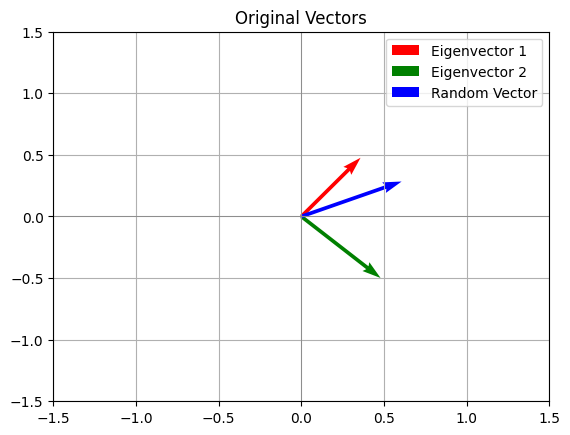

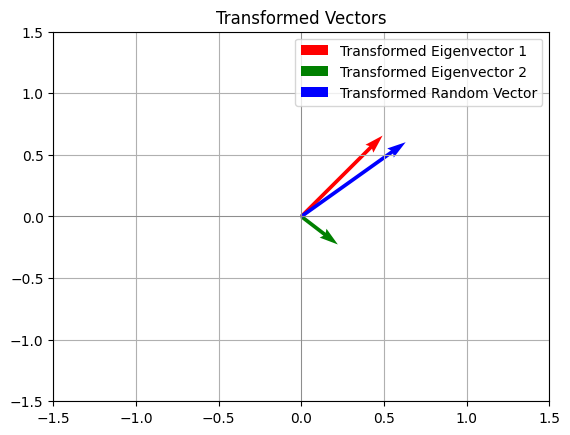

In [81]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[:, 0], eigenvectors[:, 1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[:, 0], A @ eigenvectors[:, 1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>
Since the red vector and the green vector are the eigenvectors of the given matrix, applying the transformation to them will not change their direction; it will only change the magnitude of these vectors (if the correspondent eigenvalue is not 1). </br>
But because the blue vector is random, the transformation might change its direction and magnitude (if the random vector is not the eigenvector, its direction and magnitude will change).

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [ ]:
def diagonalize(A):
    eigenvalues = np.array(compute_eigenvalues(A), float)
    P = np.array(compute_eigenvectors(A)).T
    D = np.diag(eigenvalues)
    P_inv = np.linalg.inv(P)
    return P, D, P_inv


to check your answer use the cells below

In [ ]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [ ]:
A = generate_valid_matrix()

P, D, P_inv = diagonalize(A)

check_diagonalization(D, A)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

When we diagonalize a given matrix A, we turn it A into multiplication of three matrices PDP^(-1). So when we try to calculate powers of A, we must calculate the equation: PDP^(-1)PDP^(-1)P...P^(-1)PDP^(-1).</br>
Since P^(-1)P = I, the middle P and P^(-1) terms disappear and the equation turn into PD^(n)P^(-1). </br>
Thus we have A^(n) = PD^(n)P^(-1). </br>
And since D is a diagonal matrix, we can calculate its powers by calculating powers of its diagonal entries. </br>
So diagonalization can speed up the process of calculating powers of a matrix.

<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [ ]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [ ]:
n_values = range(1, 1000)

In [ ]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [ ]:
def compute_powers_your_way(A, n):
    P, D, P_inv = diagonalize(A)

    diagonal_D = np.diagonal(D)
    powered_diagonal = diagonal_D ** n
    powered_D = np.diag(powered_diagonal)

    return P @ powered_D @ P_inv

In [ ]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

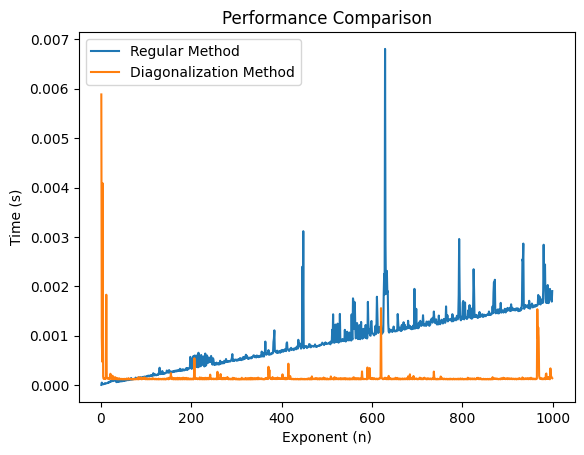

In [ ]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**In the section below, implement QR decompostion step by step :**

In [3]:
def gram_schmidt(A):
    # TODO: define Q and R matrices with correct dimensions
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    # TODO: complete the loop
    for j in range(n):
        # TODO: orthogonalize and compute values for R matrix and Q matrix using dot product
      v = A[:, j]

      for i in range(j):
          R[i, j] = np.dot(Q[:, i], A[:, j])
          v = v - R[i, j] * Q[:, i]

      R[j, j] = np.linalg.norm(v)
      Q[:, j] = v / R[j, j]

    # TODO: return Q and R matrices
    return Q, R


Now, let's check if the decompostion. No need to change the following cell.

In [12]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    # Q, R = gram_schmidt(A)
    Q, R = qr_householder(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.67954381 0.05552419 0.83635386 0.75045484]
 [0.53932517 0.68421052 0.7759735  0.2052242 ]
 [0.30628407 0.73597372 0.81586984 0.78180355]
 [0.5413104  0.31708455 0.56328907 0.49445466]]

Orthogonal matrix Q:
[[ 0.71682991 -0.02507383  0.68937822 -0.10140935]
 [-0.06667844  0.991828    0.09867632 -0.04576222]
 [-0.68988523 -0.12385112  0.68226654 -0.2079222 ]
 [-0.07594232  0.01759023  0.22256016  0.97179747]]

Upper triangular matrix R:
[[ 0.19874674 -0.53763823 -0.05785128 -0.05264031]
 [ 0.48946719  0.59165337  0.65752365  0.09660066]
 [ 0.85112282  0.67849317  1.33514074  1.1810423 ]
 [ 0.36876801  0.11817502  0.25744107  0.23246083]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [46]:
def householder_reflection(a):
    # TODO: compute H and return it from vector a

    # Compute the norm of vector a
    norm_a = math.sqrt(np.dot(a, a))

    # Create the unit vector e1 with the same length as a
    e1 = np.zeros_like(a)
    e1[0] = 1

    # Compute the vector v
    v = a + np.sign(a[0]) * norm_a * e1
    v = v / math.sqrt(np.dot(v, v))

    # Compute the Householder matrix H
    H = np.eye(len(a)) - 2 * np.outer(v, v)

    # TODO: return H
    return H

def qr_householder(A):
    # TODO: use householder_reflection on R matrix step by step and update Q and R by rules R <- HR and Q <- HQ
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        # TODO: Create the Householder reflection matrix for column i
        a = R[i:, i]
        H = householder_reflection(a)

        H_i = np.eye(m)
        H_i[i:, i:] = H

        # TODO: Apply the Householder transformation to R
        R = np.dot(H_i, R)

        # TODO: Accumulate the transformations in Q
        Q = np.dot(Q, H_i)

    # TODO: return Q and R
    return Q, R

Now, let's check if the decompostion.


In [47]:
test_QR_decomposition()

Matrix A:
[[0.55679065 0.23324287 0.5445876  0.75786304]
 [0.49840027 0.25365993 0.56795931 0.71658988]
 [0.62239456 0.33929055 0.84289702 0.35108405]
 [0.28485592 0.23135823 0.31187169 0.28508282]]

Orthogonal matrix Q:
[[-0.54943982  0.54932492  0.4956167  -0.38822945]
 [-0.49182032  0.05104294  0.07642405  0.86583298]
 [-0.61417762 -0.15743405 -0.72244147 -0.27582367]
 [-0.28109521 -0.81905511  0.47602706 -0.15340288]]

Upper triangular matrix R:
[[-1.01337878e+00 -5.26326378e-01 -1.18390616e+00 -1.06459697e+00]
 [ 1.84035236e-17 -1.01837361e-01 -5.99949382e-02  1.64118778e-01]
 [-3.42427213e-17  2.69096448e-18 -1.47171933e-01  3.12443742e-01]
 [-1.83870548e-17  2.12517171e-17  1.83773485e-18  1.85652588e-01]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [66]:
def qr_algorithm(A, num_iterations=1000, tol=1e-10):
    n = A.shape[0]
    B = np.copy(A)
    Q_total = np.eye(n)

    for _ in range(num_iterations):
        # Perform QR decomposition
        Q, R = qr_householder(B)

        # Update B
        B = np.dot(R, Q)

        # Accumulate the transformations in Q_total
        Q_total = np.dot(Q_total, Q)

        # Check for convergence
        if np.allclose(B - np.diag(np.diag(B)), np.zeros_like(B), atol=tol):
            break

    # Extract the eigenvalues
    eigenvalues = np.diag(B)

    return eigenvalues, Q_total

def compute_eigenvectors(A, eigenvalues):
    n = A.shape[0]
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        # Construct the matrix (A - lambda * I)
        lambda_i = eigenvalues[i]
        I = np.eye(n)
        M = A - lambda_i * I

        # Solve for the null space of (A - lambda * I)
        _, _, vh = np.linalg.svd(M)
        eigenvector = vh[-1, :]
        eigenvectors[:, i] = eigenvector

    return eigenvectors

Let's verify our results. no need to change the following cell.

In [68]:
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)

    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)

    # Verify the results
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, eigenvectors @ np.diag(eigenvalues)))

    # Compare with NumPy's eig function
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real

    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)

    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)

    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(np_eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.12895128 0.84070734 0.22955585 0.93550801]
 [0.35992415 0.69265418 0.38556696 0.85568813]
 [0.59144951 0.86386367 0.8695218  0.58114655]
 [0.88427129 0.71191464 0.25211455 0.89147718]]

Eigenvalues (QR Algorithm):
[ 2.50398065  0.5784464  -0.36505381 -0.13476879]

Eigenvectors (QR Algorithm):
[[-0.42406481 -0.17361441 -0.63969552 -0.23915414]
 [-0.45570371  0.04241645 -0.37673822 -0.67595123]
 [-0.58081651  0.92052235  0.28456213  0.38665786]
 [-0.52455252 -0.34741545  0.60653305  0.57999219]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 2.50398065 -0.36505381 -0.13476879  0.5784464 ]

Eigenvectors (NumPy):
[[-0.42406481 -0.63969552  0.23915414 -0.17361441]
 [-0.45570371 -0.37673822  0.67595123  0.04241645]
 [-0.58081651  0.28456213 -0.38665786  0.92052235]
 [-0.52455252  0.60653305 -0.57999219 -0.34741545]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
